**Δημόκριτος Κολίτσος sdi1900085**

**Παναγιώτα Τσίχλη sdi1900199**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Data Mining/Data/marketing_campaign.csv', sep='\t')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# **1. Προεπεξεργασία/Καθάρισμα**

## Πληροφορίες για τα δεδομένα πριν το καθάρισμα

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.describe(include = "all")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [ ]:
print(df.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [ ]:
# πίνακας που δείχνει απο που λείπουν πληροφορίες και αν υπάρχουν περίεργα μηδενικά
def missing_zero_values(df):
    missing_values = df.isnull().sum()
    zero_values = (df == 0).astype(int).sum()

    percent_missing_values = missing_values / len(df) * 100
    percent_zero_values = zero_values / len(df) * 100

    table = pd.concat([missing_values, percent_missing_values, zero_values, percent_zero_values], axis=1)
    table.columns = ['Missing Values', '% Missing Values', 'Zero Values', '% Zero Values']
    table.index.name = 'Column Name'

    return table

missing_zero_values(df)

,Missing Values,% Missing Values,Zero Values,% Zero Values
Column Name,,,,
ID,0,0.000000,1,0.044643
Year_Birth,0,0.000000,0,0.000000
Education,0,0.000000,0,0.000000
Marital_Status,0,0.000000,0,0.000000
Income,24,1.071429,0,0.000000
Kidhome,0,0.000000,1293,57.723214
Teenhome,0,0.000000,1158,51.696429
Dt_Customer,0,0.000000,0,0.000000
Recency,0,0.000000,28,1.250000


## Καθάρισμα δεδομένων

In [ ]:
# συμπλήρωμα των άδειων τιμών στο πεδίο income με τον μέσο όρο των υπόλοιπων τιμών
df ['Income'].fillna (round(df ['Income'].mean()), inplace=True)
missing_zero_values(df)

,Missing Values,% Missing Values,Zero Values,% Zero Values
Column Name,,,,
ID,0,0.0,1,0.044643
Year_Birth,0,0.0,0,0.000000
Education,0,0.0,0,0.000000
Marital_Status,0,0.0,0,0.000000
Income,0,0.0,0,0.000000
Kidhome,0,0.0,1293,57.723214
Teenhome,0,0.0,1158,51.696429
Dt_Customer,0,0.0,0,0.000000
Recency,0,0.0,28,1.250000


## Μετατροπή ημερομηνιών σε DateTime objects

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],  format='%d-%m-%Y')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


## Μετατροπή/Κωδικοποίηση dtype: object σε αριθμητικές τιμές

In [ ]:
print(df.dtypes)

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [ ]:
print(df['Education'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [ ]:
print(df['Marital_Status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [ ]:
education_map = {
    'Basic': 0,
    'Graduation': 1,
    'Master': 2,
    'PhD': 3,
    '2n Cycle': 4
}
marital_status_map = {
    'Single': 0,
    'Together': 1,
    'Married': 2,
    'Divorced': 3,
    'Widow': 4,
    'Alone': 5,
    'Absurd': 6, 
    'YOLO': 7
}

df['Education'] = df['Education'].map(education_map)
df['Marital_Status'] = df['Marital_Status'].map(marital_status_map)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,1,0,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,1,0,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,1,1,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,3,2,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,2,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,3,1,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,1,3,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,2,1,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


# **2. Marital Status και Education**



In [ ]:
df['Education'].unique()

array([1, 3, 2, 0, 4])

In [ ]:
df['Marital_Status'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
df.loc[(df['Marital_Status'] >= 5) & (df['Marital_Status'] <= 7), 'Marital_Status'] = 0

df['Marital_Status'].unique()

array([0, 1, 2, 3, 4])

## Education Graph

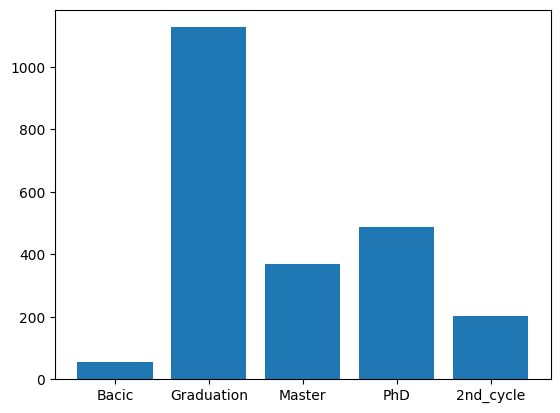

In [ ]:
basic_count = df[df['Education'] == 0].shape[0]
graduation_count = df[df['Education'] == 1].shape[0]
master_count = df[df['Education'] == 2].shape[0]
phd_count = df[df['Education'] == 3].shape[0]
secondcycle_count = df[df['Education'] == 4].shape[0]


# Create a bar chart of the education counts
plt.bar(['Bacic', 'Graduation', 'Master', 'PhD', '2nd_cycle'], [basic_count, graduation_count, master_count, phd_count, secondcycle_count])

# Show the chart
plt.show()

## Marial Status Graph

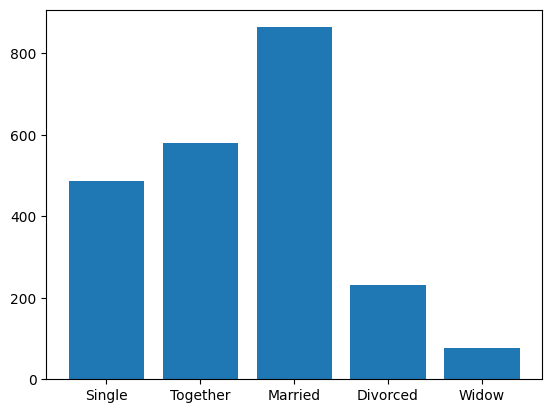

In [ ]:
single_count = df[df['Marital_Status'] == 0].shape[0]
together_count = df[df['Marital_Status'] == 1].shape[0]
married_count = df[df['Marital_Status'] == 2].shape[0]
divorced_count = df[df['Marital_Status'] == 3].shape[0]
widow_count = df[df['Marital_Status'] == 4].shape[0]

# Create a bar chart of the education counts
plt.bar(['Single', 'Together', 'Married', 'Divorced', 'Widow'], [single_count, together_count, married_count, divorced_count, widow_count])

# Show the chart
plt.show()

# **3. Δημιουργία νέων χαρακτηριστικών**

## Α. "Customer_For"

In [ ]:
from datetime import datetime

current_date = datetime.now().date()
df['Customer_For'] = (current_date - df['Dt_Customer'].dt.date).dt.days
df['Customer_For'] -= df['Recency']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,1,0,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,3833
1,2174,1954,1,0,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,3303
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,3514
3,6182,1984,1,1,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,3341
4,5324,1981,3,2,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,3295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,2,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,3563
2236,4001,1946,3,1,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,3191
2237,7270,1981,1,3,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,3292
2238,8235,1956,2,1,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,3376


## Β. "Age"

In [ ]:
current_year = current_date.year
df['Age'] = current_year - df['Year_Birth']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age
0,5524,1957,1,0,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,3833,66
1,2174,1954,1,0,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,3303,69
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,3514,58
3,6182,1984,1,1,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,3341,39
4,5324,1981,3,2,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,3295,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,2,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,3563,56
2236,4001,1946,3,1,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,3191,77
2237,7270,1981,1,3,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,3292,42
2238,8235,1956,2,1,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,3376,67


## Γ. "Spent"

In [ ]:
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent
0,5524,1957,1,0,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,3833,66,1617
1,2174,1954,1,0,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,3303,69,27
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,3514,58,776
3,6182,1984,1,1,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,3341,39,53
4,5324,1981,3,2,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,3295,42,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,2,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,3563,56,1341
2236,4001,1946,3,1,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,3191,77,444
2237,7270,1981,1,3,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,3292,42,1241
2238,8235,1956,2,1,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,3376,67,843


## Δ. "Παιδιά"

In [ ]:
df['Παιδιά'] = df['Kidhome'] + df['Teenhome']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Παιδιά
0,5524,1957,1,0,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,3833,66,1617,0
1,2174,1954,1,0,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,3303,69,27,2
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,3514,58,776,0
3,6182,1984,1,1,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,3341,39,53,1
4,5324,1981,3,2,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,3295,42,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,2,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,11,0,3563,56,1341,1
2236,4001,1946,3,1,64014.0,2,1,2014-06-10,56,406,...,1,0,0,3,11,0,3191,77,444,3
2237,7270,1981,1,3,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,3292,42,1241,0
2238,8235,1956,2,1,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,11,0,3376,67,843,1


## Ε. "Family_Size"

In [ ]:
df['Family_Size'] = df['Παιδιά'] + 1 # ο αριθμός των παιδιών + τον πελάτη
df.loc[df['Marital_Status'] == 2, 'Family_Size'] += 1 # + σύντροφος (παντρεμένος)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Παιδιά,Family_Size
0,5524,1957,1,0,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,3833,66,1617,0,1
1,2174,1954,1,0,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,3303,69,27,2,3
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,3514,58,776,0,1
3,6182,1984,1,1,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,3341,39,53,1,2
4,5324,1981,3,2,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,3295,42,422,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,2,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,3563,56,1341,1,3
2236,4001,1946,3,1,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,3191,77,444,3,4
2237,7270,1981,1,3,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,3292,42,1241,0,1
2238,8235,1956,2,1,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,3376,67,843,1,2


## Στ. "Is_Parent"

In [ ]:
df['Is_Parent'] = df['Παιδιά'].apply(lambda x: 1 if x > 0 else 0)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Παιδιά,Family_Size,Is_Parent
0,5524,1957,1,0,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,3833,66,1617,0,1,0
1,2174,1954,1,0,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,3303,69,27,2,3,1
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,3514,58,776,0,1,0
3,6182,1984,1,1,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,3341,39,53,1,2,1
4,5324,1981,3,2,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,3295,42,422,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,2,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,3563,56,1341,1,3,1
2236,4001,1946,3,1,64014.0,2,1,2014-06-10,56,406,...,0,3,11,0,3191,77,444,3,4,1
2237,7270,1981,1,3,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,3292,42,1241,0,1,0
2238,8235,1956,2,1,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,3376,67,843,1,2,1


## Ζ. "Living_With"

In [ ]:
df['Living_With'] = df.apply(lambda row: 'Partner' if row['Marital_Status'] == 2 else 'Alone', axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Παιδιά,Family_Size,Is_Parent,Living_With
0,5524,1957,1,0,58138.0,0,0,2012-09-04,58,635,...,3,11,1,3833,66,1617,0,1,0,Alone
1,2174,1954,1,0,46344.0,1,1,2014-03-08,38,11,...,3,11,0,3303,69,27,2,3,1,Alone
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,...,3,11,0,3514,58,776,0,1,0,Alone
3,6182,1984,1,1,26646.0,1,0,2014-02-10,26,11,...,3,11,0,3341,39,53,1,2,1,Alone
4,5324,1981,3,2,58293.0,1,0,2014-01-19,94,173,...,3,11,0,3295,42,422,1,3,1,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,2,61223.0,0,1,2013-06-13,46,709,...,3,11,0,3563,56,1341,1,3,1,Partner
2236,4001,1946,3,1,64014.0,2,1,2014-06-10,56,406,...,3,11,0,3191,77,444,3,4,1,Alone
2237,7270,1981,1,3,56981.0,0,0,2014-01-25,91,908,...,3,11,0,3292,42,1241,0,1,0,Alone
2238,8235,1956,2,1,69245.0,0,1,2014-01-24,8,428,...,3,11,0,3376,67,843,1,2,1,Alone


## Η. “Age Group”

In [ ]:
# Αντιστοίχιση ηλικίας με το αντίστοιχο γρουπ
def map_age_group(age):
    if age >= 21 and age <= 30:
        return "21-30"
    elif age >= 31 and age <= 40:
        return "31-40"
    elif age >= 41 and age <= 50:
        return "41-50"
    elif age >= 51 and age <= 60:
        return "51-60"
    elif age >= 61 and age <= 70:
        return "61-70"
    elif age >= 71 and age <= 80:
        return "71-80"
    else:
        return ">80"

df['Age_Group'] = df['Age'].apply(map_age_group)

# Κωδικοποίηση των γκρουπ σε αριθμούς
age_group_map = {"21-30": 0, "31-40": 1, "41-50": 2, "51-60": 3, "61-70": 4, "71-80": 5, ">80": 6}
df['Age_Group'] = df['Age_Group'].map(age_group_map)
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Customer_For,Age,Spent,Παιδιά,Family_Size,Is_Parent,Living_With,Age_Group
0,5524,1957,1,0,58138.0,0,0,2012-09-04,58,635,...,11,1,3833,66,1617,0,1,0,Alone,4
1,2174,1954,1,0,46344.0,1,1,2014-03-08,38,11,...,11,0,3303,69,27,2,3,1,Alone,4
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,...,11,0,3514,58,776,0,1,0,Alone,3
3,6182,1984,1,1,26646.0,1,0,2014-02-10,26,11,...,11,0,3341,39,53,1,2,1,Alone,1
4,5324,1981,3,2,58293.0,1,0,2014-01-19,94,173,...,11,0,3295,42,422,1,3,1,Partner,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,2,61223.0,0,1,2013-06-13,46,709,...,11,0,3563,56,1341,1,3,1,Partner,3
2236,4001,1946,3,1,64014.0,2,1,2014-06-10,56,406,...,11,0,3191,77,444,3,4,1,Alone,5
2237,7270,1981,1,3,56981.0,0,0,2014-01-25,91,908,...,11,0,3292,42,1241,0,1,0,Alone,2
2238,8235,1956,2,1,69245.0,0,1,2014-01-24,8,428,...,11,0,3376,67,843,1,2,1,Alone,4


# **4. Outliers**

In [ ]:
import numpy as np

years = df['Year_Birth'].unique()
years = np.sort(years)
print(years)

[1893 1899 1900 1940 1941 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996]


In [ ]:
df['Income'].nunique()

1975

In [ ]:
df['Kidhome'].unique()

array([0, 1, 2])

In [ ]:
df['Teenhome'].unique()

array([0, 1, 2])

In [ ]:
df['Recency'].unique()

array([58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91,
       86, 41, 42, 63,  0, 69, 89,  4, 96, 56, 31,  8, 55, 37, 76, 99,  3,
       88, 80, 72, 24, 92, 39, 29,  2, 54, 57, 30, 12, 18, 75, 90,  1, 25,
       40,  9, 87,  5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27,
       74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77,
       81, 14, 52, 93, 50, 60, 66, 97, 62,  6, 33, 67, 22, 71,  7])

Για τα outliers χρησιμοποιούμε την μέθοδο IQR.

In [ ]:
columns = ['Year_Birth', 'Income', 'Recency']

for col in columns:
    # Υπολογισμό ΙQR για κάθε column
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    # Υπολογισμός άνω και κάτω ορίου για τα outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Εύρεση outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Διαγραφή outliers απο το DataFrame 
    df.drop(outliers.index, inplace=True)

years = df['Year_Birth'].unique()
years = np.sort(years)
years

array([1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996])

In [ ]:
df['Income'].nunique()

1964

In [ ]:
df['Recency'].unique()

array([58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91,
       86, 41, 42, 63,  0, 69, 89,  4, 96, 56, 31,  8, 55, 37, 76, 99,  3,
       88, 80, 72, 24, 92, 39, 29,  2, 54, 57, 30, 12, 18, 75, 90,  1, 25,
       40,  9, 87,  5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27,
       74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 78, 77, 81,
       14, 52, 98, 93, 50, 60, 66, 97, 62,  6, 33, 67, 22, 71,  7])

# **5. Heatmap**

In [ ]:
print(df.columns.tolist())

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Customer_For', 'Age', 'Spent', 'Παιδιά', 'Family_Size', 'Is_Parent', 'Living_With', 'Age_Group']


In [ ]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                       int64
Marital_Status                  int64
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

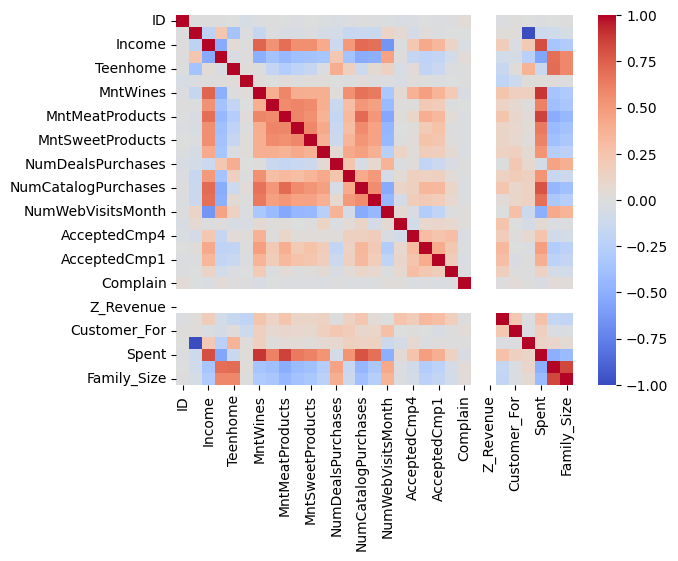

In [ ]:
import seaborn as sns

columns = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Customer_For', 'Age', 'Spent', 'Παιδιά', 'Family_Size']

# Create a new DataFrame from the selected columns
heatmap_df = df[columns]

# Calculate the correlation matrix
corr_matrix = heatmap_df.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm')

# Show the plot
plt.show()

# **6. Γραφήματα**

## 1. Σε ποιά κατηγορία Marital_Status ανήκει το μεγαλύτερο ποσοστό των πελατών της εταιρείας;

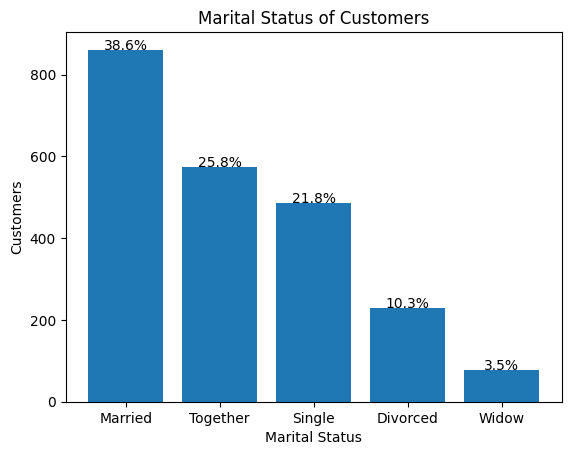

In [ ]:
marital_status_map_r = {v: k for k, v in marital_status_map.items()} # αντίστροφο map απ το marital_status_map που είχαμε δημιουργήσει για την κωδικοποίηση της marital_status στήλης
df['Marital_Status'] = df['Marital_Status'].replace(marital_status_map_r) # αντιστρέφουμε προσορινά τα στοιχία της στήλης στα αρχικά μη αριθμητικά στοιχία για να εμφανίζονται αυτά στο γράφημα

marital_status_count = df['Marital_Status'].value_counts()
plt.bar(marital_status_count.index, marital_status_count.values)

df['Marital_Status'] = df['Marital_Status'].map(marital_status_map) # επιστρέφω την στήλη marital_status στην κωδικοποιημένη της μορφή

plt.title('Marital Status of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Customers')

totals = sum(marital_status_count.values)
for i, v in enumerate(marital_status_count.values):
    percentage = f'{(v / totals * 100):.1f}%'   # βρίσκουμε το ποσοστό κάθε κατηγορίας
    plt.text(i, v, percentage, color='black', ha='center')

plt.show()

## 2. Πόσοι πελάτες έχουν κάνει Complain;

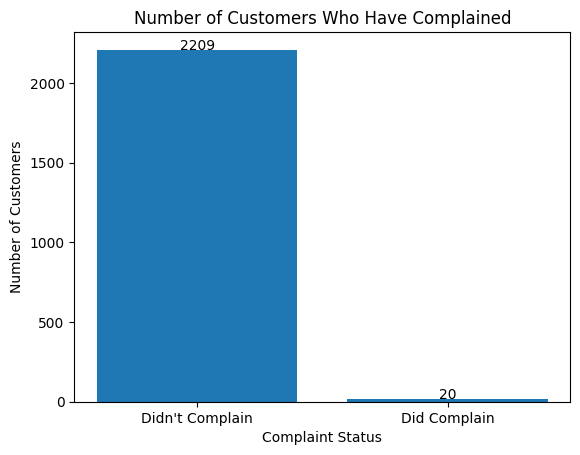

In [ ]:
complain_count = df['Complain'].value_counts()
plt.bar(['Didn\'t Complain', 'Did Complain'], complain_count.values, tick_label=['Didn\'t Complain', 'Did Complain']) # εμφανίζουμε Didn\'t Complain για 0 και Did Complain για 1 στο γράφημα

plt.xlabel('Complaint Status')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Who Have Complained')

# εμφανίζουμε τον αριθμό σε κάθε κολόνα στο γράφημα
for i, v in enumerate(complain_count.values):
    plt.text(i, v, str(v), color='black', ha='center')

plt.show()

## 4. Η σχέση μεταξύ του αριθμού των αγορών Spent και του αριθμού των παιδιών και του μεγέθους της οικογένειας.

<Axes: xlabel='Family_Size', ylabel='Παιδιά'>

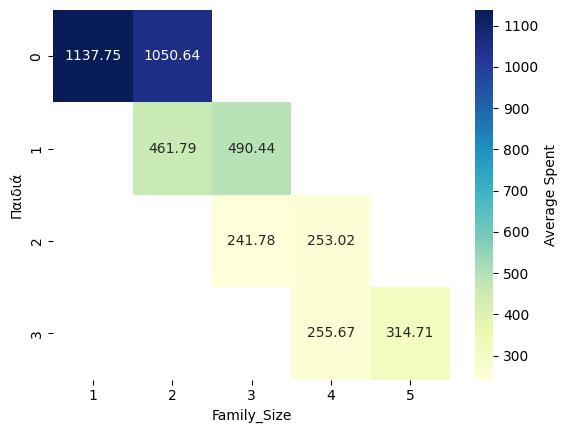

In [ ]:
# ομαδοποιούμε όλους τους πελάτες που έχουν τον ίδιο αριθμό παιδιών και μέγεθος οικογένιας και υπολογίζουμε για το κάθε γκρουπ τον μέσο όρο που έχουν ξοδέψει
grouped = df.groupby(['Παιδιά', 'Family_Size'])['Spent'].mean().reset_index() # reset_index() μετασχηματίζει το αποτέλεσμα σε dataframe
# μετατρέπουμε το dataframe σε πίνακα
heatmap_data = pd.pivot_table(grouped, values='Spent', index='Παιδιά', columns='Family_Size')
# χρησιμοποιούμε τον πίνακα για να δημιουργηθεί το heatmap
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Average Spent'})

## 5. Τι σχέση έχει η ηλικία Age Group με το χαρακτηριστικό Spent των αγορών;

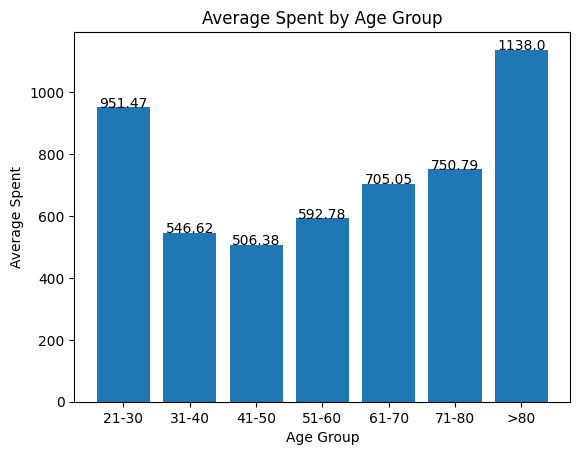

In [ ]:
age_group_map_r = {v: k for k, v in age_group_map.items()} # αντίστροφο map απ το age_group_map που θα χρησιμοποιηθεί για την 'αντίστροφη κωδικοποίηση' των στοιχείων του Age_Group στον x άξονα του γραφήματος 
grouped = df.groupby('Age_Group')['Spent'].mean().reset_index() # βρίσκει το μέσο όρο που έχει ξοδέψει το κάθε γρουπ
grouped['Age_Group'] = grouped['Age_Group'].replace(age_group_map_r) 

plt.bar(grouped['Age_Group'], grouped['Spent'])

plt.xlabel('Age Group')
plt.ylabel('Average Spent')
plt.title('Average Spent by Age Group')

for i, v in enumerate(grouped['Spent']):
    plt.text(i, v, str(round(v, 2)), color='black', ha='center')

plt.show()

## 6. Τι σχέση έχει το εισόδημα Income με το χαρακτηριστικό Spent των αγορών;

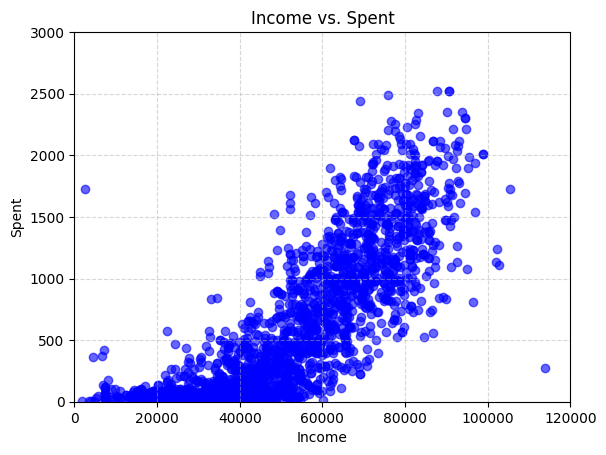

In [ ]:
# για την σύγκριση του εισοδήματος με το πόσα ξόδεψε ο κάθε πελάτης εμφανίζουμε ένα scatter plot γράφημα με τα 2 χαρακτηριστικά στους 2 άξονες
plt.scatter(df['Income'], df['Spent'], alpha=0.6, c='b') # το κάθε σημείο είναι λίγο διάφανο για να δοθεί έμφαση όπου υπάρχουν περισσότερα

plt.xlabel('Income')
plt.ylabel('Spent')
plt.title('Income vs. Spent')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 120000)
plt.ylim(0, 3000)
plt.show()

## 7. Ποια είναι η σχέση μεταξύ της εκπαίδευσης και του εισοδήματος

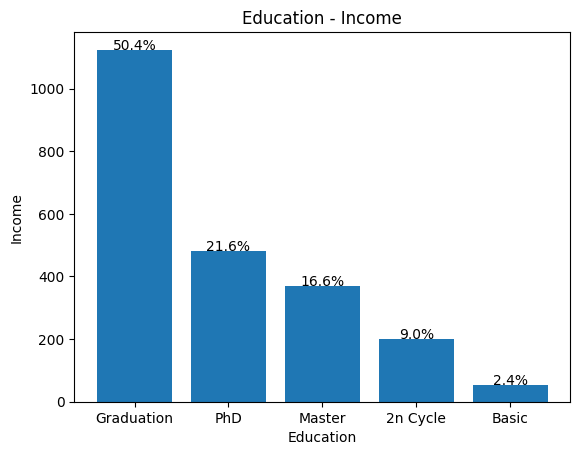

In [ ]:
education_map_r = {v: k for k, v in education_map.items()} # αντίστροφο map απ το education_map που είχαμε δημιουργήσει για την κωδικοποίηση της marital_status στήλης
df['Education'] = df['Education'].replace(education_map_r) # αντιστρέφουμε προσορινά τα στοιχία της στήλης στα αρχικά μη αριθμητικά στοιχία για να εμφανίζονται αυτά στο γράφημα

education_count = df['Education'].value_counts()
plt.bar(education_count.index, education_count.values)

df['Education'] = df['Education'].map(education_map) # επιστρέφω την στήλη education στην κωδικοποιημένη της μορφή

plt.title('Education - Income')
plt.xlabel('Education')
plt.ylabel('Income')

totals = sum(education_count.values)
for i, v in enumerate(education_count.values):
    percentage = f'{(v / totals * 100):.1f}%'   # βρίσκουμε το ποσοστό κάθε κατηγορίας
    plt.text(i, v, percentage, color='black', ha='center')

plt.show()

## 8.  Ποια είναι η σχέση μεταξύ του εισοδήματος και του μεγέθους της οικογένειας

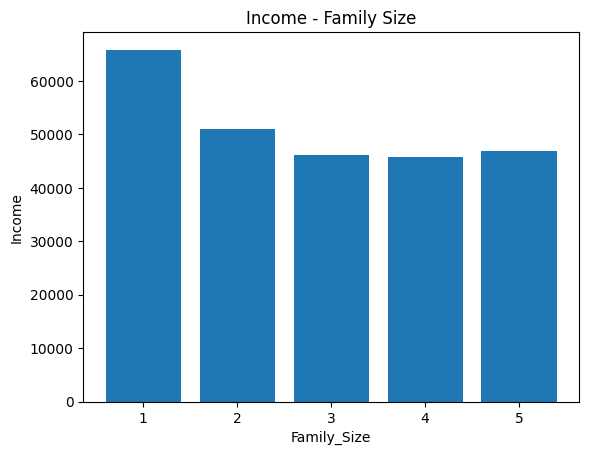

In [ ]:
grouped_data = df.groupby('Family_Size')['Income'].mean()
plt.bar(grouped_data.index, grouped_data.values)

plt.xlabel('Family_Size')
plt.ylabel('Income')
plt.title(f"Income - Family Size")

plt.show()

## 9.Ποια είναι η σχέση μεταξύ του εισοδήματος και του αριθμού των παιδιών

In [ ]:
df['Παιδιά'].unique()

array([0, 2, 1, 3])

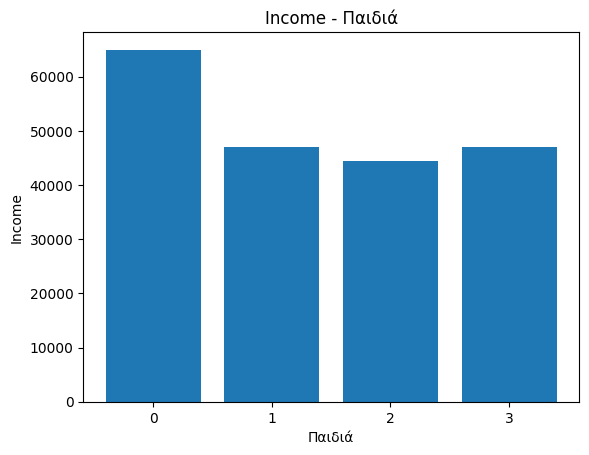

In [ ]:
grouped_data = df.groupby('Παιδιά')['Income'].mean()
plt.bar(grouped_data.index, grouped_data.values)

plt.xlabel('Παιδιά')
plt.ylabel('Income')
plt.title(f"Income - Παιδιά")
plt.xticks(range(0, 4))

plt.show()

## 15. Income Histogram


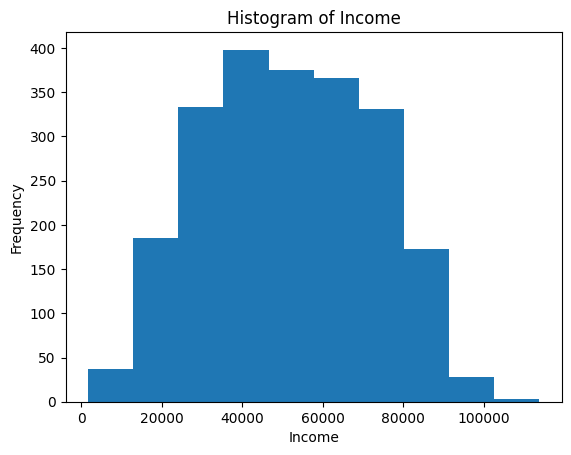

In [ ]:
plt.hist(df['Income'])

plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title(f"Histogram of Income")

plt.show()

## 17. Family_Size ιστόγραμμα



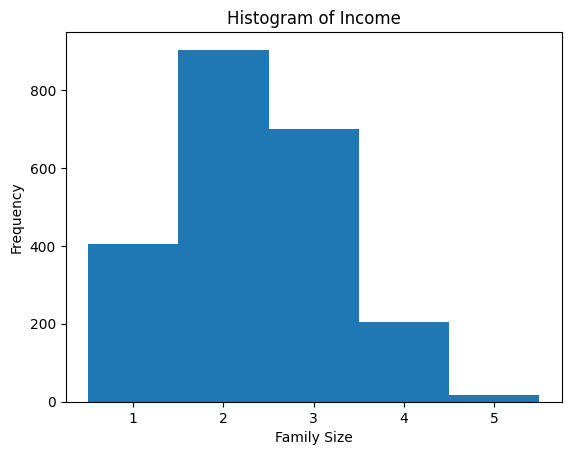

In [ ]:
plt.hist(df['Family_Size'], bins=range(1,7), align='left')

plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.title(f"Histogram of Income")

plt.show()

# **7. PCA**

<Axes3D: title={'center': 'PCA'}, xlabel='PCA Component 1', ylabel='PCA Component 2', zlabel='PCA Component 3'>

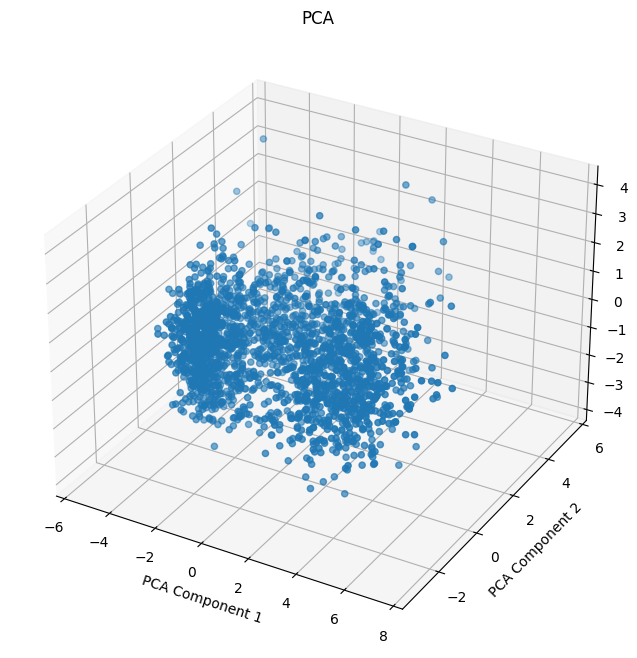

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

marital_status_map_r = {v: k for k, v in marital_status_map.items()} # αντίστροφο map απ το marital_status_map που είχαμε δημιουργήσει για την κωδικοποίηση της marital_status στήλης στην ερώτηση 1
df['Marital_Status'] = df['Marital_Status'].replace(marital_status_map_r) # αντιστρέφουμε προσορινά τα στοιχία της στήλης στα αρχικά μη αριθμητικά στοιχία για να εμφανίζονται αυτά στο γράφημα

education_map_r = {v: k for k, v in education_map.items()} # αντίστροφο map απ το education_map που είχαμε δημιουργήσει για την κωδικοποίηση της education στήλης στην ερώτηση 1
df['Education'] = df['Education'].replace(education_map_r) # αντιστρέφουμε προσορινά τα στοιχία της στήλης στα αρχικά μη αριθμητικά στοιχία για να εμφανίζονται αυτά στο γράφημα

le = LabelEncoder()

df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['Living_With'] = le.fit_transform(df['Living_With'])

#Διαγραφη περιττων στηλών
df.drop(['Kidhome', 'Teenhome', 'Year_Birth', 'Age_Group', 'Is_Parent', 'Family_Size', 'Dt_Customer', 'Recency', 'Living_With'], axis=1, inplace=True)

# Δημιουργία αντιγράφου του dataframe με αριθμητικές στήλες
numeric_df = df.select_dtypes(include=['int64', 'float64']).copy()

# Διαγραφή στηλών που σχετίζονται με προσφορές και προωθητικές ενέργειες
numeric_df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'], axis=1, inplace=True)

numeric_cols = ['ID', 'Education', 'Marital_Status', 'Income', 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',  'NumDealsPurchases', 'NumWebPurchases', 
                'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue', 'Customer_For', 'Age', 'Spent', 'Παιδιά']
# Standardization
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)


# PCA
pca = PCA(n_components=3)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2', 'PC3'])

# Σχεδίαση τρισδιάστατου διαγράμματος
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df_pca['PC1']
ys = df_pca['PC2']
zs = df_pca['PC3']
ax.scatter(xs, ys, zs)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('PCA')
ax

# **8. Υλοποίηση Συσταδοποίησης (Clustering)**

## Μέθοδος ELBOW

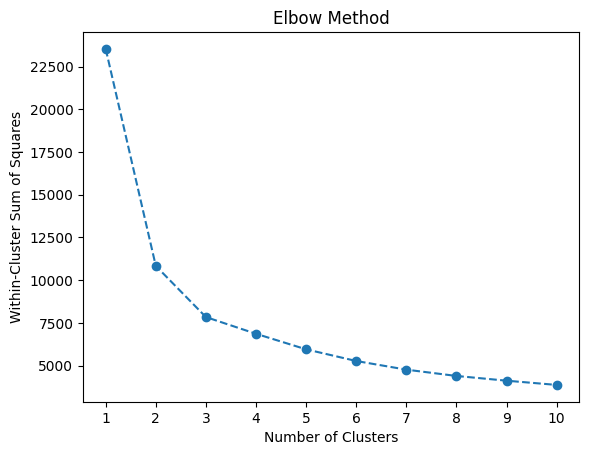

In [ ]:
from sklearn.cluster import KMeans

# λίστα WCSS
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method')
plt.show()

## Συσταδοποίηση

### **K-Means**

In [ ]:
# εφαρμογή k-means συσταδοποίησης για 3 συστάδες
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(df_pca)
kmeans_labels = kmeans.labels_

print("Number of points assigned to each cluster:")
print(pd.Series(kmeans_labels).value_counts())

Number of points assigned to each cluster:
2    1035
0     608
1     586
dtype: int64


### **Agglomerative**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# εφαρμογή ιεραρχικής μεθόδου συσταδοποίησης για 3 συστάδες
agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg_clustering.fit_predict(df_pca)
agg_labels = agg_clustering.labels_

print("Number of points assigned to each cluster:")
print(pd.Series(agg_labels).value_counts())

Number of points assigned to each cluster:
1    984
0    686
2    559
dtype: int64


## Εμφάνιση των σχηματιζόμενων συστάδων μέσω διαγράμματος

### **K-Means**

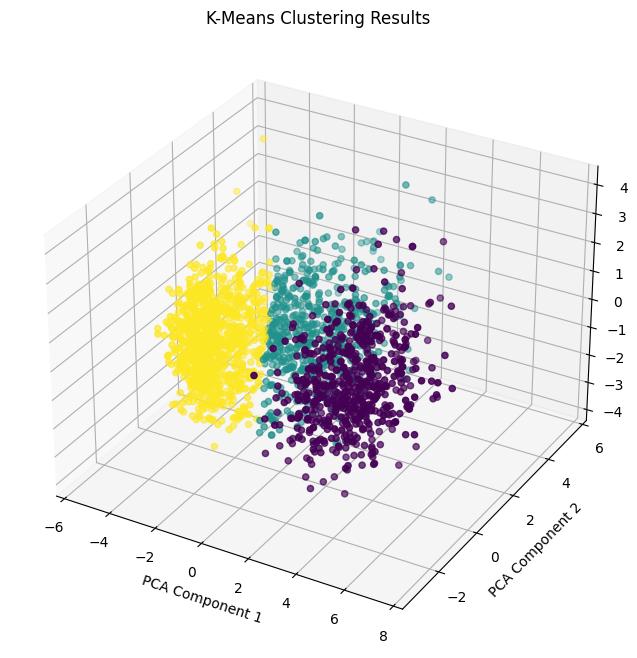

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=kmeans_labels, cmap='viridis')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('K-Means Clustering Results')

plt.show()

### **Agglomerative**

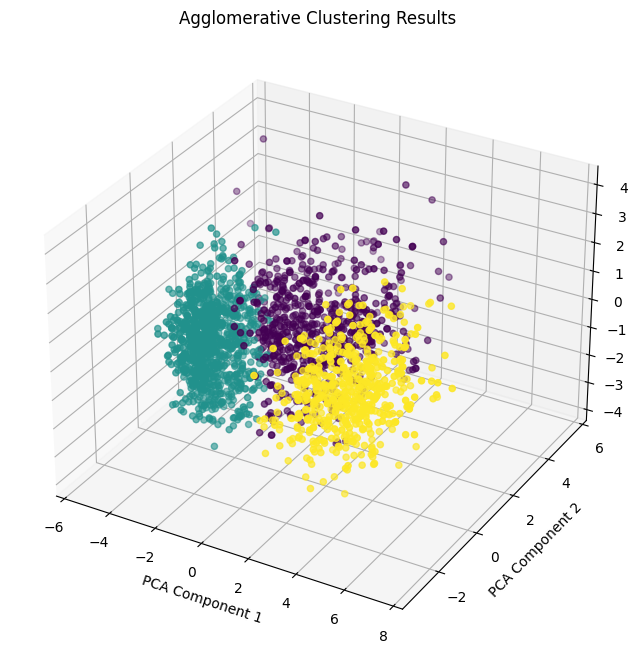

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=agg_labels, cmap='viridis')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Agglomerative Clustering Results')

plt.show()